In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')
matplotlib.rcParams['figure.figsize'] = (18, 10)
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }

In [ ]:
dados_iris = load_iris(as_frame=True)

In [ ]:
base_completa = pd.concat((dados_iris['data'], dados_iris['target']), axis=1)

In [ ]:
base_completa['target'] = base_completa['target'].apply(lambda x: dados_iris.target_names[x])

**Como é uma base completa e limpa. não vão ter outliers ou dados faltantes, podemos pular direto para a analise dessa base.**

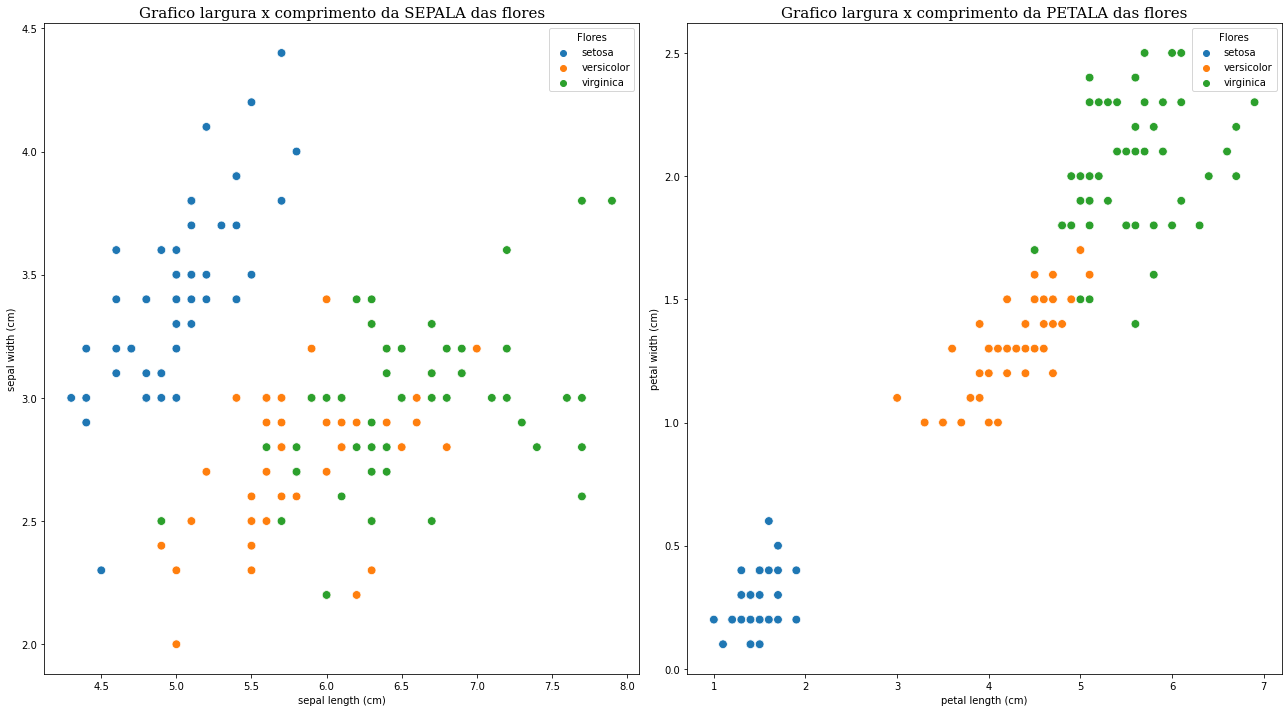

In [ ]:
# Fazendo uma analise apenas nas sepalas 
fig, axes = plt.subplots(1,2)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=base_completa.rename(columns={'target': 'Flores'}), hue = 'Flores', s=75, ax=axes[0])
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=base_completa.rename(columns={'target': 'Flores'}), hue = 'Flores', s=75, ax=axes[1])
axes[0].set_title("Grafico largura x comprimento da SEPALA das flores", fontdict=font, size=15, loc='center')
axes[1].set_title("Grafico largura x comprimento da PETALA das flores", fontdict=font, size=15, loc='center')
plt.tight_layout()
plt.show()

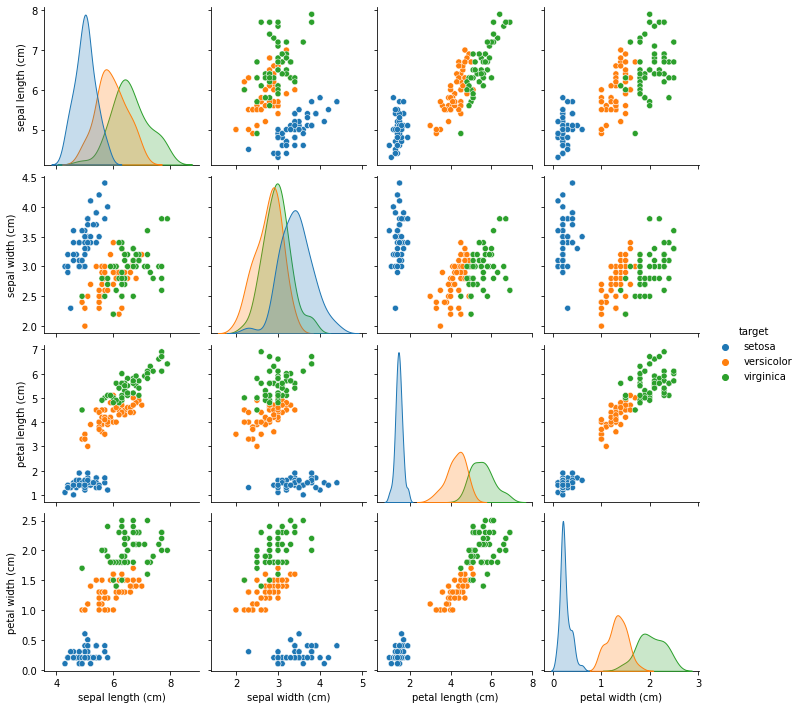

In [ ]:
# como podemos ver, conseguimos distriguir visualmente a setosa das outras,
# porem nao conseguimos, com os dados que obtivemos, diferenciar versicolor e
# virginica quando vemos as sepalas, agora quando vemos as petalas
# conseguimos distinguir muito bom as 3 flores

sns.pairplot(base_completa, hue='target')

In [ ]:
base_completa['target'].value_counts() # como podemos ver, a base é super balanceada

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

In [ ]:
base_completa.groupby('target').mean() # Conseguimos mais informações para descrever o comportamento das flores

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [ ]:
# ja que temos 4 variaveis e o ser humano não consegue visualizar nem imaginar(ou pelo menos é bem dificil)
# vamos fazer uma redução de dimensionalidade (tentando manter o maior numero de padroes possivel)
# e visualizar no R³ as informações

pca = PCA(n_components=3) # iremos reduzir para 3 dimensões 

In [ ]:
base_reduzida = pca.fit_transform(base_completa.iloc[:,[0,1,2,3]])

In [ ]:
fig = px.scatter_3d(pd.concat((pd.DataFrame(base_reduzida), base_completa['target']), axis=1), x=0, y=1, z=2,  color='target')
fig.show(render="colab")

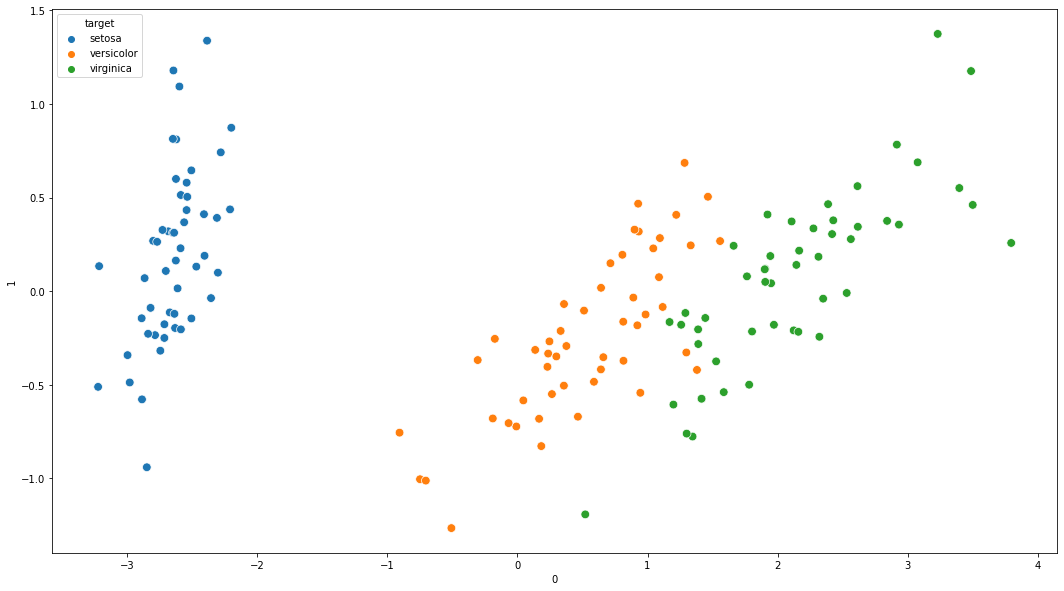

In [ ]:
pca = PCA(n_components=2) # iremos reduzir para 2 dimensões 
base_reduzida = pca.fit_transform(base_completa.iloc[:,[0,1,2,3]])

sns.scatterplot(data=pd.concat((pd.DataFrame(base_reduzida), base_completa['target']), axis=1), x=0, y=1, hue='target', s=75)
plt.show()

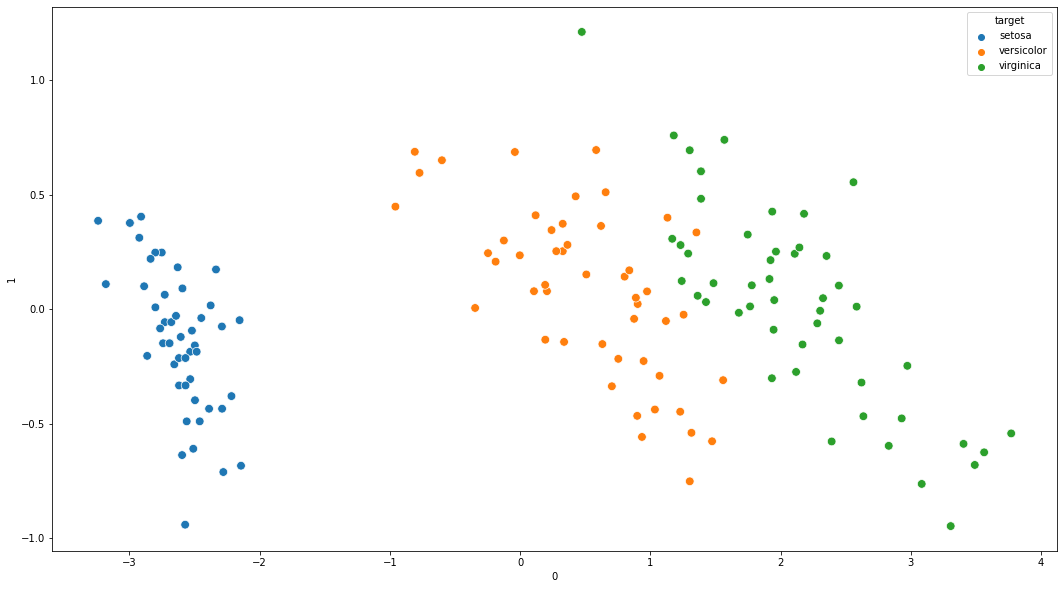

In [ ]:
# em busca da melhor representação, podemos tirar alguma coluna que menos impacta no target
pca = PCA(n_components=2) # iremos reduzir para 2 dimensões 
base_reduzida = pca.fit_transform(SelectKBest(chi2, k=3).fit_transform(dados_iris['data'], dados_iris['target']))
sns.scatterplot(data=pd.concat((pd.DataFrame(base_reduzida), base_completa['target']), axis=1), x=0, y=1, hue='target', s=75)
plt.show()

**Agora que ja conhecemos melhor nossa base, vamos tentar prever qual é a classe da flor com base nos dados informados!.**

In [ ]:
# como nossa base tem poucos registros, vamos fazer direto com a base de treino, a validação e o teste
# para nao correr o risco de ter outfit ou underfit, vamos fazer validação cruzada!

In [ ]:
regr_logistica = LogisticRegression()

In [ ]:
scores = cross_validate(regr_logistica, dados_iris['data'], dados_iris['target'], cv=KFold(3),
                        scoring=('accuracy'), 
                        return_train_score=True)

In [ ]:
regr_logistica.fit(dados_iris['data'], dados_iris['target'])

LogisticRegression()

In [ ]:
scores

{'fit_time': array([0.01200724, 0.00700712, 0.00627041]),
 'score_time': array([0.00160217, 0.00151777, 0.0015831 ]),
 'test_accuracy': array([0., 0., 0.]),
 'train_accuracy': array([0.96, 1.  , 1.  ])}

In [ ]:
base_completa.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
accuracy_score(dados_iris['target'], regr_logistica.predict(dados_iris['data']))
# com esse modelo simples, conseguimos um total de 97,3% de acertos em nossas previsões
# como nossos dados variam de 0 ate 6.9(para o tamanho das petalas), vamos fazer a analise pelas petalas 

0.9733333333333334

In [ ]:
regr_logistica.predict_proba(np.array([5.843333,3.057333, 3.758000, 1.199333]).reshape(1,-1))

array([[0.0519264 , 0.93780287, 0.01027073]])

In [ ]:
regr_logistica.predict_proba(np.array([7.900000	,4.400000, 6.900000	, 2.500000]).reshape(1,-1)) 

array([[2.88490515e-08, 1.15234615e-03, 9.98847625e-01]])